## Video Game Sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\User\\Desktop\\데마\\중간고사 대체과제\\dataset\\vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [2]:
# 수치형 데이터의 요약정보 확인
df.info()
print()
print(df.Publisher.value_counts().head(10))
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Compu

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


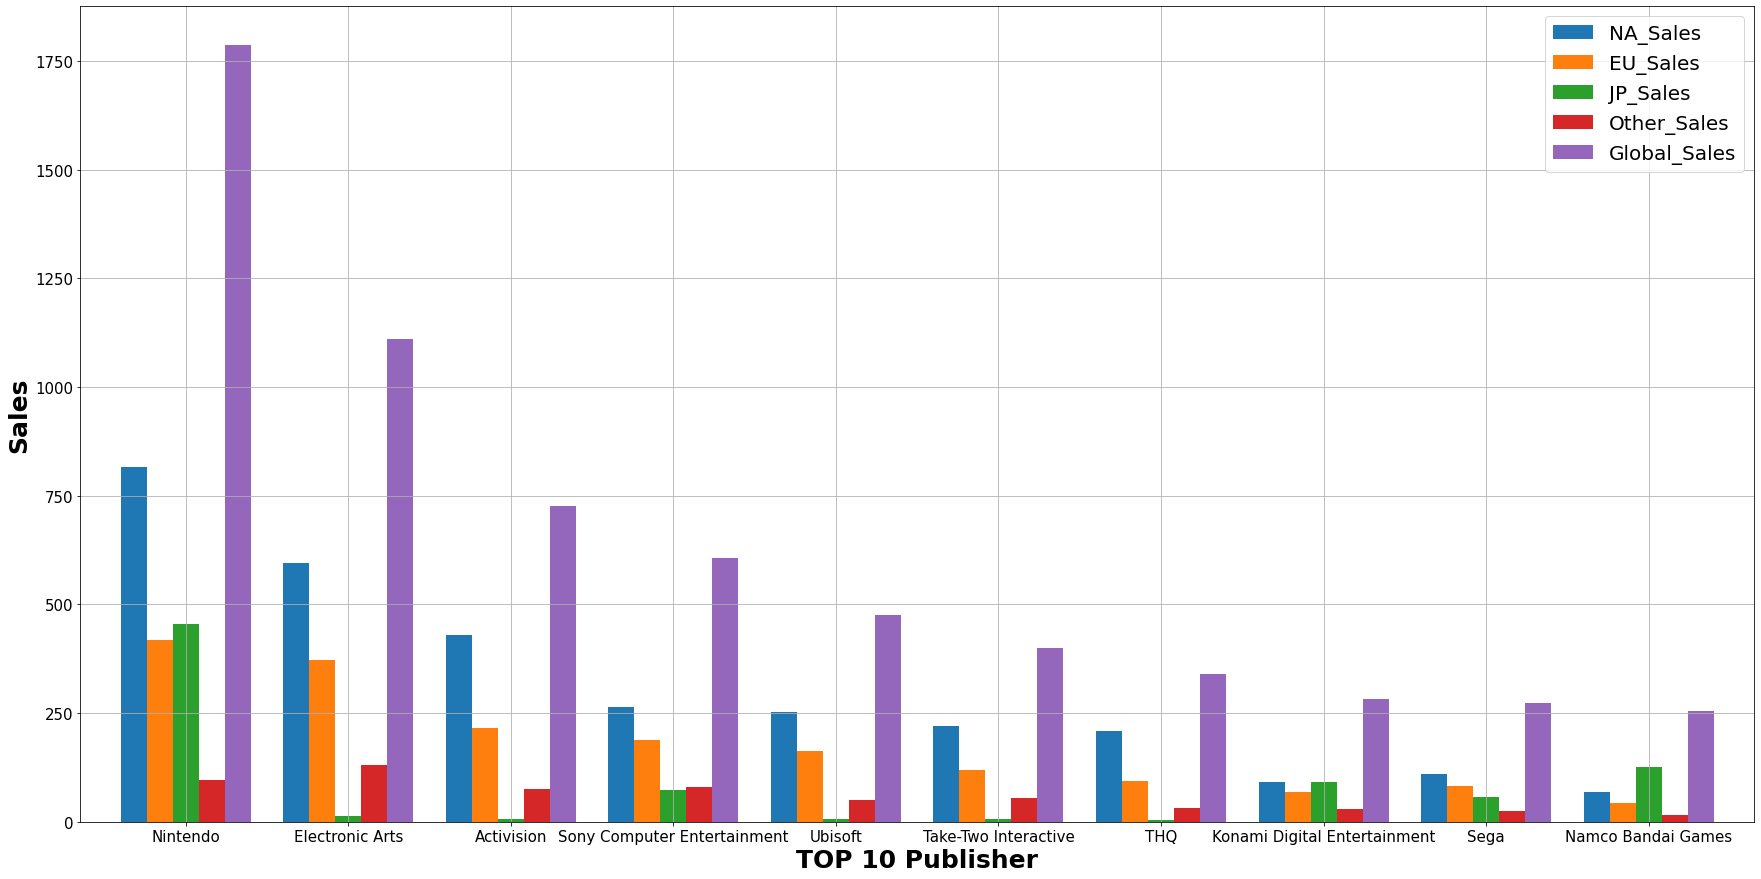

In [3]:
grouped = df.groupby('Publisher').sum().sort_values('Global_Sales', ascending = False).drop(['Rank','Year'], axis=1)
grouped[:10].plot(kind = 'bar', figsize = (30,15), rot= 0, fontsize = 12, grid= True, width=0.8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("TOP 10 Publisher", fontsize=25, fontweight='bold')
plt.ylabel("Sales", fontsize= 25, fontweight='bold')
plt.legend(fontsize=20)
plt.show()

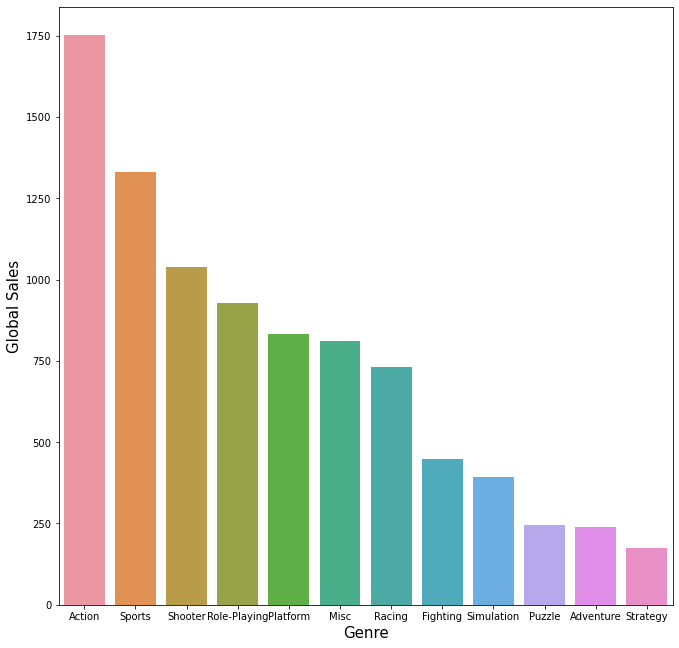

In [5]:
gen2sale=df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(11,11))
sns.barplot(x=gen2sale.index, y=gen2sale.values)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Global Sales", fontsize=15)
plt.show()

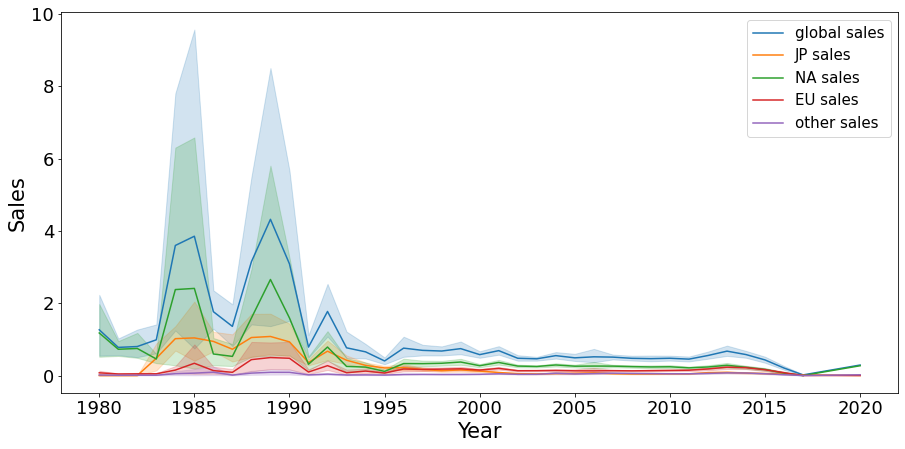

In [7]:
# 연도 별 전체적인 sales변화
plt.figure(figsize=(15,7))

sns.lineplot(x=df.Year, y=df.Global_Sales, label='global sales')
sns.lineplot(x=df.Year, y=df.JP_Sales, label='JP sales')
sns.lineplot(x=df.Year, y=df.NA_Sales, label='NA sales')
sns.lineplot(x=df.Year, y=df.EU_Sales, label='EU sales')
sns.lineplot(x=df.Year, y=df.Other_Sales, label='other sales')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Year", size = 21)
plt.ylabel("Sales", size = 21)
plt.legend(fontsize=15)

plt.show()